In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
#https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt

df = pd.read_excel('/Users/martinwolf/Desktop/SuperDepot Python/Data/vl06o items.XLSX') 

#rename all Columns
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R']
df = df.drop(['A','B','D','E','F','G','H','I','J','K','L','M','N','P','Q','R'], axis=1)

df = df.set_index('C')
df.index = pd.to_datetime(df.index)
df.columns = ['O']
df = df.groupby(['C'])['O'].sum()

df


ModuleNotFoundError: No module named 'pandas'

In [ ]:
fig = px.bar(df, x=df.index, y=df, title='Vl06o Items')
fig.show()


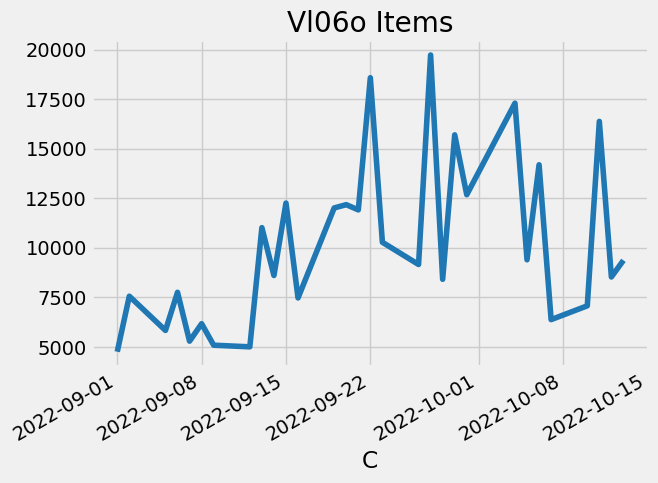

In [ ]:
df.plot(#style='.',
        #figsize=(15, 5),
        color=color_pal[0],
        title='Vl06o Items')
plt.show()

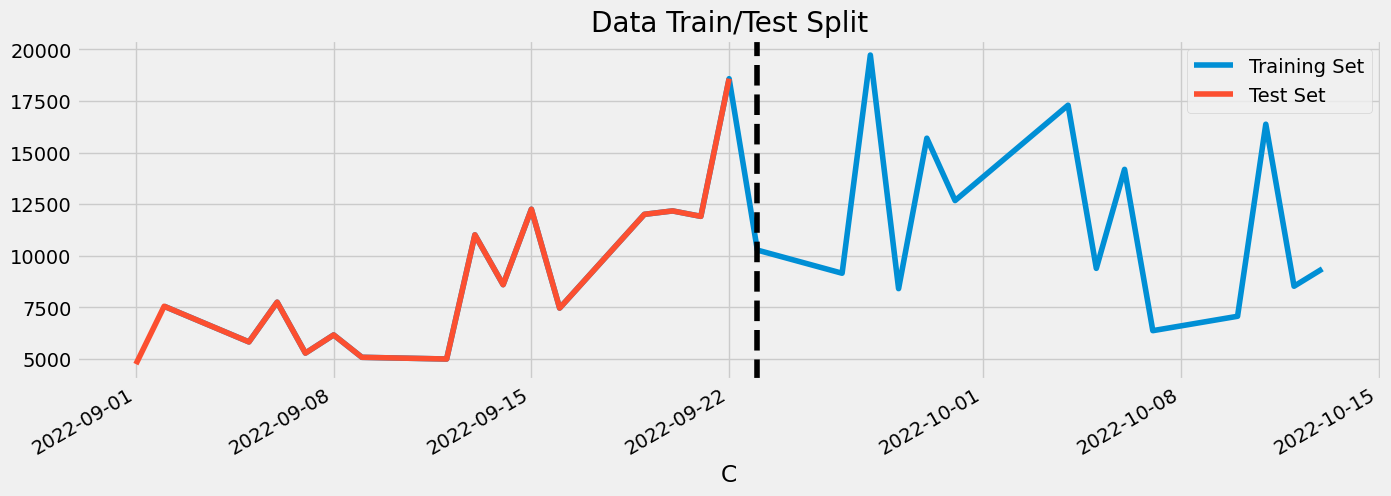

In [ ]:
test = df.loc[df.index < '9/23/2022']
train = df.loc[df.index >= '9/2/2022']
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('9/23/2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
# add to df.index time 00:00:00
df.index = df.index + pd.DateOffset(hours=1, minutes=1, seconds=2)

In [ ]:
df.index

DatetimeIndex(['2022-09-01 01:01:02', '2022-09-02 01:01:02',
               '2022-09-05 01:01:02', '2022-09-06 01:01:02',
               '2022-09-07 01:01:02', '2022-09-08 01:01:02',
               '2022-09-09 01:01:02', '2022-09-12 01:01:02',
               '2022-09-13 01:01:02', '2022-09-14 01:01:02',
               '2022-09-15 01:01:02', '2022-09-16 01:01:02',
               '2022-09-19 01:01:02', '2022-09-20 01:01:02',
               '2022-09-21 01:01:02', '2022-09-22 01:01:02',
               '2022-09-23 01:01:02', '2022-09-26 01:01:02',
               '2022-09-27 01:01:02', '2022-09-28 01:01:02',
               '2022-09-29 01:01:02', '2022-09-30 01:01:02',
               '2022-10-04 01:01:02', '2022-10-05 01:01:02',
               '2022-10-06 01:01:02', '2022-10-07 01:01:02',
               '2022-10-10 01:01:02', '2022-10-11 01:01:02',
               '2022-10-12 01:01:02', '2022-10-13 01:01:02'],
              dtype='datetime64[ns]', name='C', freq=None)

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
   # df['dayofweek'] = df.index.dayofweek
    # df['quarter'] = df.index.quarter
    # df['month'] = df.index.month
    df['year'] = df.index.year
    # df['dayofyear'] = df.index.dayofyear
    #df['dayofmonth'] = df.index.day
    #df['weekofyear'] = df.index.isocalendar().week
    return df

#df = create_features(df)
df.head()

C
2022-09-01 01:01:02    4755.674
2022-09-02 01:01:02    7557.326
2022-09-05 01:01:02    5830.540
2022-09-06 01:01:02    7754.340
2022-09-07 01:01:02    5288.236
Name: O, dtype: float64

ValueError: Could not interpret input 'hour'

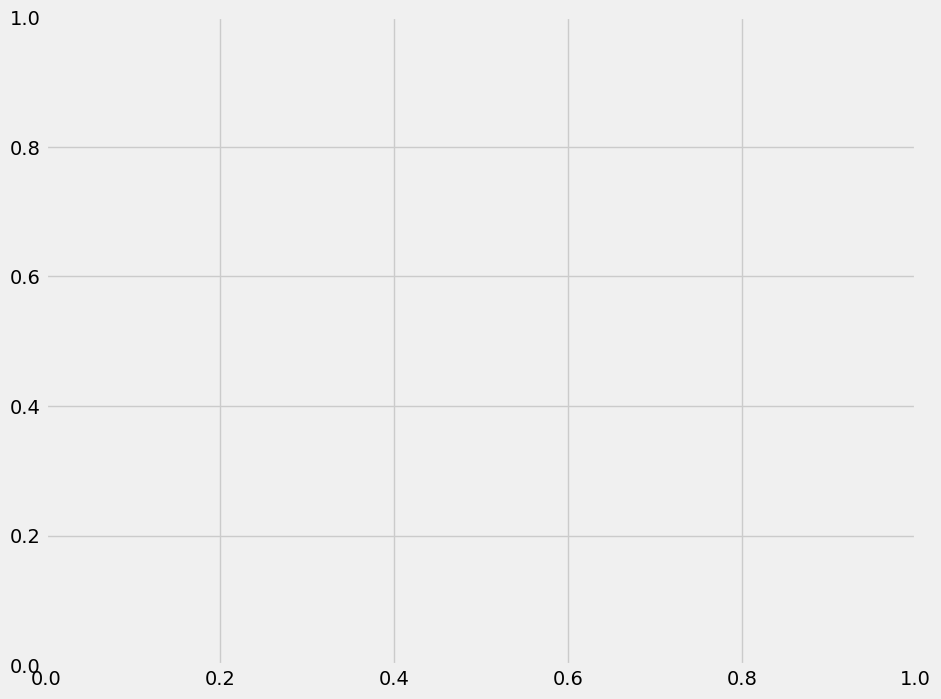

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', palette='Blues')
ax.set_title('MW by Month')
plt.show()